In [1]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4)
client = Client(cluster)
client



Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/6990/1,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/6990/4,Total threads: 4
Dashboard: http://137.129.155.67:44765/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/VARIANCE/ANOMALY_FILTERED/'
indir_data_RAW = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/VARIANCE/RAW_ANOMALY/'
ds_FILTER = xr.open_mfdataset(indir_data_FILTERED + 'OLR_YEAR.nc', chunks = {'time' : 1}, parallel = True)
ds_RAW = xr.open_mfdataset(indir_data_RAW + 'OLR_YEAR.nc', chunks = {'time' : 1}, parallel = True)

In [3]:
ds_RAW = ds_RAW

In [4]:
var = ['OLR_MRG','OLR_Kelvin','OLR_Rossby','OLR_TD','OLR_MJO']
ds_Var = ds_FILTER.copy()
ds_Var = ds_Var*0.
da_RAW = ds_RAW['OLR_ano']
for v in var :
    da_FILTER = ds_FILTER[v]
    ds_Var[v] = da_FILTER/da_RAW

ds_Var

<xarray.Dataset>
Dimensions:     (lat: 60, lon: 360)
Coordinates:
  * lat         (lat) float32 -29.5 -28.5 -27.5 -26.5 ... 26.5 27.5 28.5 29.5
  * lon         (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    OLR_Kelvin  (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_Rossby  (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_MJO     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_MRG     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_EIG     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_WIG     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_TD      (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_LF      (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>

In [5]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-20.1, 
                         max_latitude=20.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='jet'

colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}

vmin, vmax = 0., 0.5

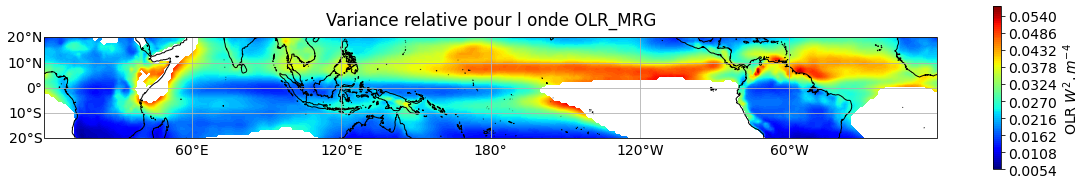

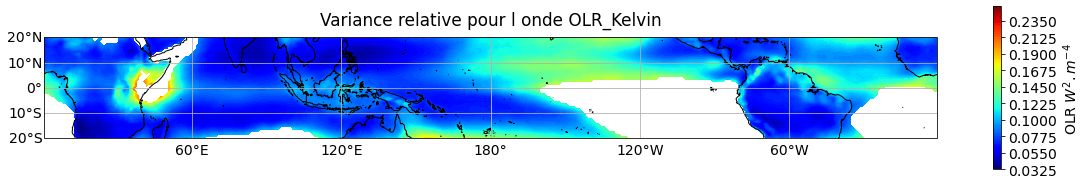

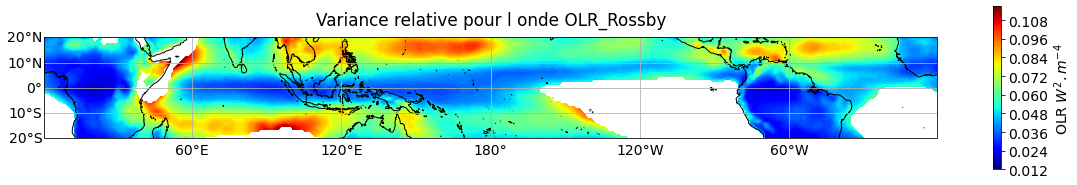

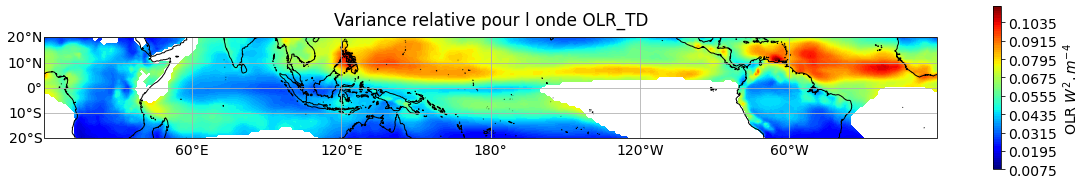

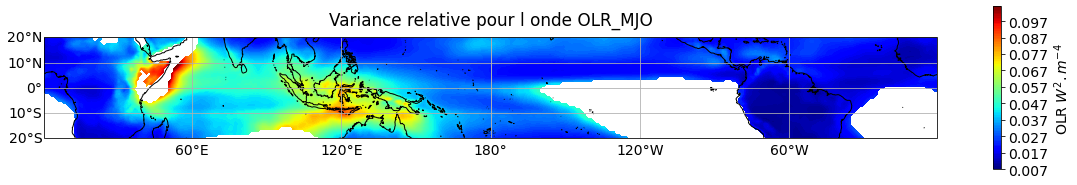

In [11]:
plt.rc("figure", figsize=(20,3))

for v in var :
    #####################################################################################
    fig, axis = plt.subplots(
        1, 1, subplot_kw={'projection': map_proj})

    ds_Var[v].where(da_RAW > 700).plot.contourf(ax=axis, levels = 101, 
                        transform=ccrs.PlateCarree(),
                        cmap=cmap , 
                        cbar_kwargs=colorbar)


    axis.coastlines()
    gl = axis.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    plt.title('Variance relative pour l onde ' + v)
    plt.show()

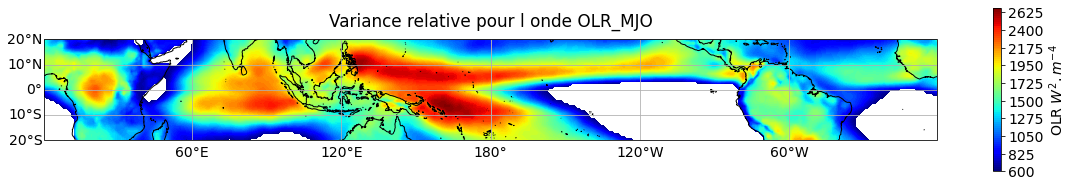

In [9]:
da_RAW

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

da_RAW.where(da_RAW > 600).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance relative pour l onde ' + v)
plt.show()